In [1]:
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
def E(q, r0, x, y):
   """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
   den = ((x-r0[0])**2 + (y-r0[1])**2)**1.5
   return q * (x - r0[0]) / den, q * (y - r0[1]) / den

In [3]:
# Grid of x, y points
nx, ny = 40, 40
x = np.linspace(-20, 20, nx)
y = np.linspace(-20, 20, ny)
X, Y = np.meshgrid(x, y)

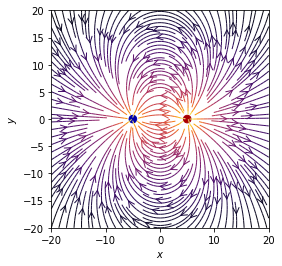

In [4]:
cones = []
cones.append((1, (5.0, 0.0)))
cones.append((-1, (-5.0, 0.0)))

# Artificial field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for cone in cones:
    ex, ey = E(*cone, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = np.log(np.sqrt(Ex**2 + Ey**2))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 0.7, color=cone_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')
plt.show()

Classic positive and negative charge field vector plot. The orange color indicates a stronger force and then 'cools' off to the weaker black color. 

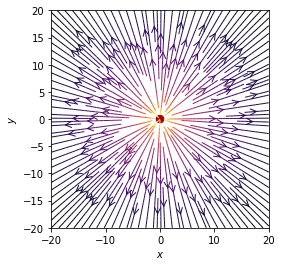

In [5]:
cones = []
cones.append((1, (0.0, 0.0)))


# Artificial field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for cone in cones:
    ex, ey = E(*cone, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = np.log(np.sqrt(Ex**2 + Ey**2))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 0.7, color=cone_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')
plt.show()

A single charge field vector plot, normally used representing objects to stay away from in path finding algorithms.
Going back to the two charge diagram I rembered that if rotated the vector field 90 degrees I would then have a vector that pointed the way between the two charges.

In [7]:
def E(q, r0, x, y):
   """Return the artificial field vector E=(Ex,Ey) due to cone q at r0."""
   den = ((x-r0[0])**2 + (y-r0[1])**2)**1.5
   return -q * (y - r0[1]) / den, q * (x - r0[0]) / den

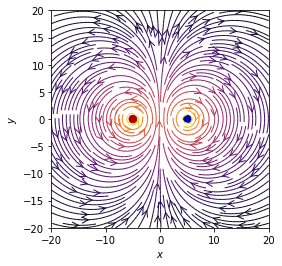

In [8]:
cones = []
cones.append((-1, (5.0, 0.0)))
cones.append((1, (-5.0, 0.0)))

# Artificial field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for cone in cones:
    ex, ey = E(*cone, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = np.log(np.sqrt(Ex**2.0 + Ey**2.0))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 0.7, color=cone_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')
plt.show()

Now you can see that you have a force vector that shows you the way between the two cones. How it works is a negative blue cone has a clockwise force so you pass by the blue cones on the left side. For red cones the force is changed to positive and the force is counter clockwise. Red cones you pass on the right.   

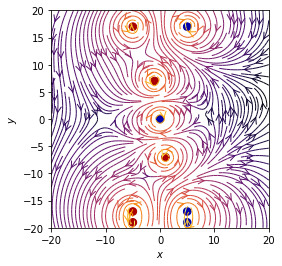

In [9]:


cones = []

#top to bottom
#finish cones
cones.append((-1, (5.0,17.0)))
cones.append((1, (-5.0, 17.0)))

# slalom cones
cones.append((1, (-1.0, 7.0)))
cones.append((-1, (0.0, 0.0)))
cones.append((1, (1.0, -7.0)))

# start cones
cones.append((-1, (5.0,-17.0)))
cones.append((1, (-5.0, -17.0)))
cones.append((-1, (5.0, -19.0)))
cones.append((1, (-5.0, -19.0)))

# Artificial field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for cone in cones:
    ex, ey = E(*cone, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = np.log(np.sqrt(Ex**2 + Ey**2))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 0.7, color=cone_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')
plt.show()

Imagine starting at point (0,-20). The force would be in the upwards direction. As you move up, the force would start pushing you to the right. When as you pass the first blue cone in the slalom you are directed right between the blue and the red cones. Then back between the red and the last blue cone in the slalom. Then the force directs you across the finish line at (0,17). Now if you get really off the 'line' then the force vectors are weaked and influenced by all the cones. The idea is that the cones you are closest too will have the strongest influence on your direction. My next step is to develop the code to step the virtual car through the course guided by the force. ;)

In [10]:
cones = []

#top to bottom
#finish cones
cones.append((-1, (5.0,17.0)))
cones.append((1, (-5.0, 17.0)))

# slalom cones
cones.append((1, (-1.0, 7.0)))
cones.append((-1, (0.0, 0.0)))
cones.append((1, (1.0, -7.0)))

# start cones
cones.append((-1, (5.0,-17.0)))
cones.append((1, (-5.0, -17.0)))
cones.append((-1, (5.0, -19.0)))
cones.append((1, (-5.0, -19.0)))

# Artificial field vector, E=(Ex, Ey), as separate components
#Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))

Xpos = 0.0
Ypos = -19.0
path = []
speed = 1.0
tries = 0
while not(Xpos < 5.0 and Xpos > -5.0 and Ypos > 17.0) and tries < 80:
    Ex = 0.0
    Ey = 0.0
    for cone in cones:
        ex, ey = E(*cone, x=Xpos, y=Ypos)
        Ex += ex
        Ey += ey
    
    #print(Ex,Ey)
    angle = np.arctan2(Ex, Ey)    
    #print(np.degrees(np.arctan2(Ex, Ey)))
    newx=  np.sin(angle) * speed
    newy= np.cos(angle) * speed
    Xpos += newx
    Ypos += newy
    path.append((Xpos,Ypos))
    tries += 1
    #print (newx, newy)
    #print(Xpos, Ypos)
    #time.sleep(.5)

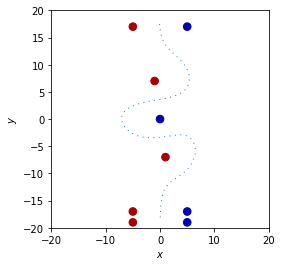

In [11]:

fig = plt.figure()
ax = fig.add_subplot(111)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 0.7, color=cone_colors[q>0]))
    
for pos in path:
     ax.add_artist(Circle(pos, 0.1))
    
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')
plt.show()

In [12]:
cones = []


cones.append((1,(372.8997,530.1002)))   #
cones.append((1,(406.9497,521.4001)))   #
cones.append((1,(337.0497,534.6002)))   #Start
cones.append((1,(337.1997,536.4001)))   #
cones.append((1,(312.4497,536.4001)))   #
cones.append((1,(300.8997,539.4001)))   #
cones.append((1,(297.1497,558.3002)))   #Stage
cones.append((1,(406.7997,511.0502)))   #
cones.append((1,(406.5297,477.3002)))   #
cones.append((1,(401.5797,444.1501)))   #
cones.append((1,(415.5297,383.2502)))   #
cones.append((-1,(407.8197,414.4502)))   #
cones.append((-1,(392.6697,475.2002)))   #
cones.append((-1,(369.5697,518.5502)))   #
cones.append((-1,(337.0497,515.0402)))   #Start
cones.append((-1,(337.0497,512.8801)))   #
cones.append((-1,(311.5797,522.6902)))   #
cones.append((-1,(300.1797,522.6902)))   #
cones.append((-1,(289.3184,522.6902)))   #
cones.append((-1,(288.9881,540.8401)))   #
cones.append((-1,(288.9881,558.1653)))   #Stage
cones.append((-1,(422.8197,353.2501)))   #
cones.append((-1,(417.4197,323.8201)))   #
cones.append((-1,(416.6997,299.3701)))   #
cones.append((1,(429.4797,323.8201)))   #
cones.append((1,(430.1997,299.3701)))   #
cones.append((1,(430.1997,228.7201)))   #
cones.append((1,(406.8897,228.7201)))   #
cones.append((1,(383.4297,228.7201)))   #
cones.append((-1,(382.1397,254.8201)))   #
cones.append((-1,(347.2797,262.9201)))   #
cones.append((-1,(324.2697,310.9201)))   #
cones.append((-1,(321.5097,370.0201)))   #
cones.append((-1,(311.5797,380.8201)))   #
cones.append((-1,(278.7297,405.4201)))   #
cones.append((-1,(254.2797,481.6201)))   #
cones.append((-1,(253.5597,501.1201)))   #
cones.append((-1,(245.3997,505.7401)))   #
cones.append((1,(312.2997,307.8002)))   #
cones.append((1,(306.7197,362.7002)))   #
cones.append((1,(265.4697,435.1501)))   #
cones.append((1,(241.9197,476.0102)))   #
cones.append((1,(194.8197,510.0302)))   #
cones.append((1,(171.8697,465.1802)))   #
cones.append((1,(184.7697,388.3802)))   #
cones.append((1,(202.7697,323.2501)))   #
cones.append((-1,(196.4097,532.5602)))   #
cones.append((-1,(159.3597,524.9703)))   #
cones.append((-1,(159.3597,504.7502)))   #
cones.append((-1,(159.3597,484.6802)))   #
cones.append((-1,(159.3294,463.2902)))   #
cones.append((-1,(176.1294,420.6902)))   #
cones.append((-1,(193.9497,355.8902)))   #
cones.append((-1,(212.2497,288.3902)))   #
cones.append((1,(213.2697,209.2501)))   #
cones.append((1,(228.4197,168.1501)))   #
cones.append((1,(277.2897,159.1501)))   #
cones.append((1,(329.1897,168.8701)))   #
cones.append((1,(395.1597,159.3901)))   #
cones.append((1,(347.9997,228.7201)))   #
cones.append((1,(336.2097,252.1201)))   #
cones.append((-1,(200.5497,209.4001)))   #
cones.append((-1,(202.0497,179.4001)))   #
cones.append((-1,(202.0497,156.0001)))   #
cones.append((-1,(218.3997,156.0001)))   #
cones.append((-1,(269.1,146.2501)))   #
cones.append((-1,(277.5006,146.2501)))   #
cones.append((-1,(329.2478,157.5002)))   #
cones.append((-1,(395.0094,134.4001)))   #
cones.append((-1,(395.0094,111.0002)))   #
cones.append((1,(418.6194,158.0701)))   #
cones.append((1,(418.5594,129.9902)))   #
cones.append((-1,(359.7594,75.75018)))   #
cones.append((-1,(316.9494,75.75018)))   #
cones.append((-1,(265.56,51.90015)))   #
cones.append((-1,(218.0094,51.90015)))   #
cones.append((-1,(183.3297,68.25018)))   #
cones.append((-1,(164.7,115.3502)))   #
cones.append((-1,(163.26,118.8002)))   #
cones.append((-1,(161.5794,122.2502)))   #
cones.append((1,(405.5097,58.59015)))   #
cones.append((1,(395.6997,58.59015)))   #
cones.append((1,(359.6991,62.79016)))   #
cones.append((1,(316.6194,64.05029)))   #
cones.append((1,(264.5997,35.85034)))   #
cones.append((1,(219.5391,33.30029)))   #
cones.append((1,(188.9391,29.85034)))   #
cones.append((1,(174.6894,59.31018)))   #
cones.append((1,(154.2894,109.1105)))   #
cones.append((1,(152.5494,112.7402)))   #
cones.append((1,(151.2294,116.4902)))   #
cones.append((1,(117.3294,163.0801)))   #
cones.append((1,(117.3594,166.5601)))   #
cones.append((1,(117.3294,169.9202)))   #
cones.append((-1,(130.5449,169.9202)))   #
cones.append((-1,(148.3949,228.5402)))   #
cones.append((-1,(148.3949,251.1308)))   #
cones.append((1,(134.7294,229.5901)))   #
cones.append((1,(134.7294,251.1308)))   #
cones.append((1,(113.2794,286.4705)))   #
cones.append((-1,(124.2449,287.1905)))   #
cones.append((-1,(125.2043,347.7905)))   #Finish

cones.append((-1,(127.5136,347.7905)))   #
cones.append((-1,(122.8049,381.6602)))   #
cones.append((-1,(122.9543,399.2101)))   #
cones.append((-1,(123.1036,416.7602)))   #
cones.append((-1,(122.8049,434.3102)))   #
cones.append((-1,(122.6561,452.0102)))   #
cones.append((-1,(122.5074,469.5602)))   #
cones.append((-1,(122.6587,487.2602)))   #Exit
cones.append((1,(112.5594,347.7905)))   #Finish
cones.append((1,(110.3847,347.7905)))   #
cones.append((1,(112.5594,381.8102)))   #
cones.append((1,(112.4987,399.2101)))   #
cones.append((1,(112.4381,416.6102)))   #
cones.append((1,(112.3775,434.0102)))   #
cones.append((1,(112.3168,451.5602)))   #
cones.append((1,(112.5562,469.4102)))   #
cones.append((1,(112.1956,487.1102)))   #Exit




# Artificial field vector, E=(Ex, Ey), as separate components
#Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))

Xpos = 293.0
Ypos = 558.0
angle = 3.14159265359
path = []
speed = 6.0
tries = 0
while not(Xpos < 122 and Xpos > 112 and Ypos > 487) and tries < 150:
    Ex = 0.0
    Ey = 0.0
    for cone in cones:
        ex, ey = E(*cone, x=Xpos, y=Ypos)
        Ex += ex
        Ey += ey
    
    #print(Ex,Ey)
    angle = np.arctan2(Ex, Ey)    
    #print(np.degrees(np.arctan2(Ex, Ey)))
    newx=  np.sin(angle) * speed
    newy= np.cos(angle) * speed
    Xpos += newx
    Ypos += newy
    path.append((Xpos,Ypos))
    tries += 1
    #print (newx, newy)
    #print(Xpos, Ypos)
    #time.sleep(.5)

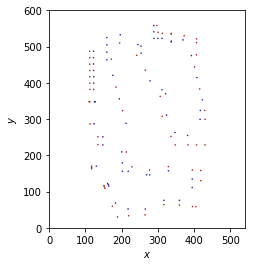

In [13]:

fig = plt.figure()
ax = fig.add_subplot(111)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 0.7, color=cone_colors[q>0]))
    
for pos in path:
     ax.add_artist(Circle(pos, 0.1))
    
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(0,540)
ax.set_ylim(0,600)
ax.set_aspect('equal')
plt.show()

In [14]:
print(np.arctan2(0,-1))

3.14159265359
